<a href="https://colab.research.google.com/github/descartesmbogning/Deciphering_Bacteriophage_Revolution/blob/main/8_funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline

In [ ]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [6, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

# Import data

In [ ]:
#Import data
data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/first_clean/data_scholar_all_year_merge.pkl')
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
data.head()

,,Publication Type,Authors,Author Full Names,Article Title,Source Title,Language,Document Type,Author Keywords,Keywords Plus,Abstract,...,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,j,"modrich, p; richardson, cc","modrich, p; richardson, cc",bacteriophage-t7 deoxyribonucleic-acid replica...,journal of biological chemistry,english,article,NaN,NaN,NaN,...,8,biochemistry & molecular biology,science citation index expanded (sci-expanded),biochemistry & molecular biology,ak272,1095579.0,NaN,NaN,NaN,2023-06-30
wos:a1975bb78600005,1975,j,"esche, h; schweiger, m; trautner, ta","esche, h; schweiger, m; trautner, ta",gene-expression of bacteriophage spp1 .1. phag...,molecular & general genetics,english,article,NaN,NaN,NaN,...,11,biochemistry & molecular biology; genetics & h...,science citation index expanded (sci-expanded),biochemistry & molecular biology; genetics & h...,bb786,814401.0,NaN,NaN,NaN,2023-06-30
wos:a1975ak49300025,1975,j,"jazwinski, sm; lindberg, aa; kornberg, a","jazwinski, sm; lindberg, aa; kornberg, a",gene-h spike protein of bacteriophages phi-x17...,virology,english,article,NaN,NaN,NaN,...,11,virology,science citation index expanded (sci-expanded),virology,ak493,1094682.0,NaN,NaN,NaN,2023-06-30
wos:a1975al49000001,1975,j,"silberstein, s; inouye, m; studier, fw","silberstein, s; inouye, m; studier, fw",studies on role of bacteriophage t7 lysozyme d...,journal of molecular biology,english,article,NaN,NaN,NaN,...,11,biochemistry & molecular biology,science citation index expanded (sci-expanded),biochemistry & molecular biology,al490,1099209.0,NaN,NaN,NaN,2023-06-30
wos:a1975ay53300001,1975,j,"levy, jn","levy, jn",effects of radiophosphorus decay in bacterioph...,virology,english,article,NaN,NaN,NaN,...,13,virology,science citation index expanded (sci-expanded),virology,ay533,1189291.0,NaN,NaN,NaN,2023-06-30


In [ ]:
data.shape

(61544, 51)

# Funding

In [ ]:
# copy of the All_data_first_clean
data_Fund = data.copy()

## funding_yes_or_no

In [ ]:
Funding_df = data_Fund[['Funding Orgs', 'Funding Name Preferred']]
Funding_df['Funding_yes_or_no'] = Funding_df['Funding Orgs'].apply(lambda x: 1 if not pd.isnull(x) else 0)
Funding_df.drop(['Funding Orgs', 'Funding Name Preferred'], axis=1, inplace=True)
Funding_df

C:\Users\dmbog\AppData\Local\Temp\ipykernel_21444\1761761927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Funding_df['Funding_yes_or_no'] = Funding_df['Funding Orgs'].apply(lambda x: 1 if not pd.isnull(x) else 0)
C:\Users\dmbog\AppData\Local\Temp\ipykernel_21444\1761761927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Funding_df.drop(['Funding Orgs', 'Funding Name Preferred'], axis=1, inplace=True)


,,Funding_yes_or_no
wos_ID,Publication Year,
wos:a1975ak27200035,1975,0
wos:a1975bb78600005,1975,0
wos:a1975ak49300025,1975,0
wos:a1975al49000001,1975,0
wos:a1975ay53300001,1975,0
...,...,...
wos:000968835000001,2023,1
wos:000933339800001,2023,0
wos:000914484900001,2023,0


In [ ]:
# Save data
Funding_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/funding_y_n.pkl')
Funding_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/funding_y_n.csv')

In [ ]:
Funding_df['Funding_yes_or_no'].value_counts()

1    33339
0    28205
Name: Funding_yes_or_no, dtype: int64

In [ ]:
Funding_df['Funding_yes_or_no'].value_counts(normalize=True)

1    0.54171
0    0.45829
Name: Funding_yes_or_no, dtype: float64

<AxesSubplot:ylabel='Funding_yes_or_no'>

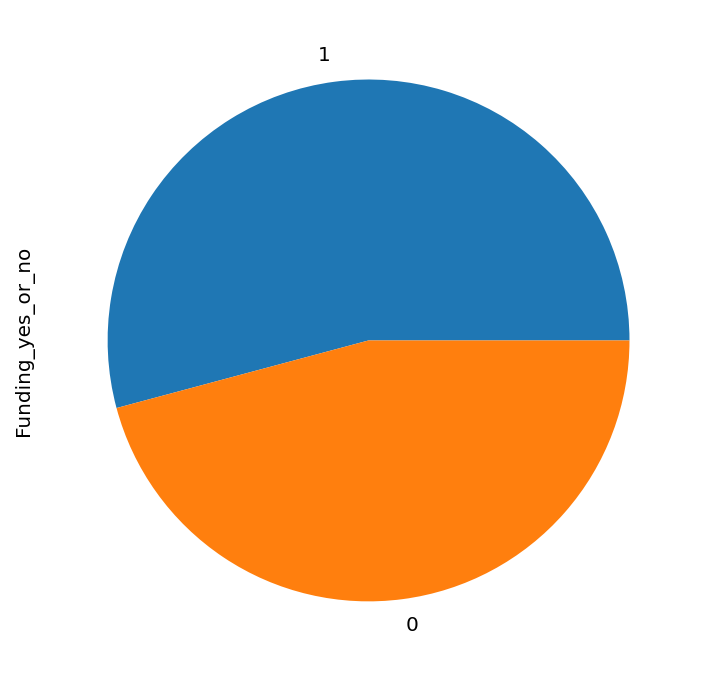

In [ ]:
Funding_df['Funding_yes_or_no'].value_counts().plot.pie()

In [ ]:
fund_count = pd.DataFrame(Funding_df['Funding_yes_or_no'].value_counts()).reset_index().rename(columns={'Funding_yes_or_no':'Number of citation'})#.plot.pie()

fund_norm = pd.DataFrame(Funding_df['Funding_yes_or_no'].value_counts(normalize=True)*100).reset_index().rename(columns={'Funding_yes_or_no':'Proportion (%)'})

fund_yes_or_no = pd.merge(fund_count, fund_norm, how="left", on=["index"]).drop('index', axis=1)
fund_yes_or_no

,Number of citation,Proportion (%)
0,33339,54.171
1,28205,45.829


In [ ]:
# # Save data
# fund_yes_or_no.to_pickle(f'../table/{year}_Funding_yes_or_no_count.pkl')
# fund_yes_or_no.to_csv(f'../table/{year}_Funding_yes_or_no_count.csv')

#### Funding_number_per_study

In [ ]:
# Funding_df = Funding_df.sort_values(by='Funding_Orgs')

In [ ]:
# Funding_df['Funding_Orgs'].sort_values()[1002]

In [ ]:
# Funding_df['Funding_Text'][1002]

In [ ]:
Funding_org_expand = data_Fund['Funding Name Preferred'].str.split('; ', expand=True)
Funding_org_expand

,,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,NaN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
wos:a1975bb78600005,1975,NaN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
wos:a1975ak49300025,1975,NaN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
wos:a1975al49000001,1975,NaN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
wos:a1975ay53300001,1975,NaN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wos:000968835000001,2023,industry -university project of fujian provinc...,development fund of fujian agriculture and for...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
wos:000933339800001,2023,NaN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
wos:000914484900001,2023,NaN,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Funding_number_per_study[0].sort_values().to_list()[:20]

In [ ]:
Funding_number_per_study_unique = (Funding_org_expand.nunique(axis=1) ).to_frame()
# Research_area_and_general_categories_df_index_set_new_unique = Research_area_and_general_categories_df_index_set_new_unique.reset_index()
Funding_number_per_study_unique = Funding_number_per_study_unique.rename(columns={0: "Number_of_funding_per_study"})
Funding_number_per_study_unique

,,Number_of_funding_per_study
wos_ID,Publication Year,
wos:a1975ak27200035,1975,0
wos:a1975bb78600005,1975,0
wos:a1975ak49300025,1975,0
wos:a1975al49000001,1975,0
wos:a1975ay53300001,1975,0
...,...,...
wos:000968835000001,2023,2
wos:000933339800001,2023,0
wos:000914484900001,2023,0


In [ ]:
Funding_number_per_study_unique.describe()

,Number_of_funding_per_study
count,61544.000000
mean,1.358979
std,1.960740
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,45.000000


In [ ]:
# Funding_number_per_study_unique['Number_of_funding_per_study'].value_counts()

In [ ]:
# Save data
Funding_number_per_study_unique.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/Funding_number_per_study.pkl')
Funding_number_per_study_unique.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/Funding_number_per_study.csv')

#### Top funding

In [ ]:
Funding_org_expand_new = Funding_org_expand.copy()

In [ ]:
# Create an empty list
Funding_Orgs_list =[]

my_list = Funding_org_expand_new.columns.to_list
# Iterate over each row
for index, rows in Funding_org_expand_new.iterrows():
    # Create list for the current row
    for i in [range(len(Funding_org_expand_new.columns))]:
        my_list=rows[i]
        for el in rows[i]:
            if el != None:
                Funding_Orgs_list.append(el)
# result
Funding_Orgs_list_df = pd.DataFrame(Funding_Orgs_list)
Funding_Orgs_list_df.shape

(113210, 1)

In [ ]:
Funding_Orgs_freq = pd.DataFrame(Funding_Orgs_list_df.value_counts())#.head(20)
Funding_Orgs_freq = Funding_Orgs_freq.rename(columns={0:'Number of citation'})
Funding_Orgs_freq = Funding_Orgs_freq.reset_index().rename(columns={0:'Funding_Name_Preferred'})
Funding_Orgs_freq

,Funding_Name_Preferred,Number of citation
0,nigms nih hhs(united states department of heal...,4160
1,national natural science foundation of china(n...,2077
2,niaid nih hhs(united states department of heal...,1869
3,national institutes of health(united states de...,1399
4,nih(united states department of health & human...,1332
...,...,...
31547,innovation promotion agency cti (cti/kti),1
31548,innovation projects of chongqing general hospital,1
31549,innovation project of state key laboratory of ...,1
31550,innovation project of guangdong academy of sci...,1


In [ ]:
Funding_Orgs_freq

,Funding_Name_Preferred,Number of citation
0,nigms nih hhs(united states department of heal...,4160
1,national natural science foundation of china(n...,2077
2,niaid nih hhs(united states department of heal...,1869
3,national institutes of health(united states de...,1399
4,nih(united states department of health & human...,1332
...,...,...
31547,innovation promotion agency cti (cti/kti),1
31548,innovation projects of chongqing general hospital,1
31549,innovation project of state key laboratory of ...,1
31550,innovation project of guangdong academy of sci...,1


In [ ]:
Funding_Orgs_freq_norm = pd.DataFrame(Funding_Orgs_list_df.value_counts(normalize=True))*100#.head(20)
Funding_Orgs_freq_norm = Funding_Orgs_freq_norm.rename(columns={0:'Proportion (%)'})
Funding_Orgs_freq_norm = Funding_Orgs_freq_norm.reset_index().rename(columns={0:'Funding_Name_Preferred'})
Funding_Orgs_freq_norm

,Funding_Name_Preferred,Proportion (%)
0,nigms nih hhs(united states department of heal...,4.896479
1,national natural science foundation of china(n...,2.444709
2,niaid nih hhs(united states department of heal...,2.199885
3,national institutes of health(united states de...,1.646677
4,nih(united states department of health & human...,1.567815
...,...,...
31547,innovation promotion agency cti (cti/kti),0.001177
31548,innovation projects of chongqing general hospital,0.001177
31549,innovation project of state key laboratory of ...,0.001177
31550,innovation project of guangdong academy of sci...,0.001177


In [ ]:
Funding_Orgs_freq_tab = pd.merge(Funding_Orgs_freq, Funding_Orgs_freq_norm, how="left", on=["Funding_Name_Preferred"])
Funding_Orgs_freq_tab

,Funding_Name_Preferred,Number of citation,Proportion (%)
0,nigms nih hhs(united states department of heal...,4160,4.896479
1,national natural science foundation of china(n...,2077,2.444709
2,niaid nih hhs(united states department of heal...,1869,2.199885
3,national institutes of health(united states de...,1399,1.646677
4,nih(united states department of health & human...,1332,1.567815
...,...,...,...
31547,innovation promotion agency cti (cti/kti),1,0.001177
31548,innovation projects of chongqing general hospital,1,0.001177
31549,innovation project of state key laboratory of ...,1,0.001177
31550,innovation project of guangdong academy of sci...,1,0.001177


In [ ]:
Funding_Orgs_freq_tab.describe()

,Number of citation,Proportion (%)
count,31552.000000,31552.000000
mean,2.692666,0.003169
std,33.846972,0.039839
min,1.000000,0.001177
25%,1.000000,0.001177
50%,1.000000,0.001177
75%,1.000000,0.001177
max,4160.000000,4.896479


In [ ]:
# Save data
Funding_Orgs_freq_tab.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/Funding_Name_Preferred.pkl')
Funding_Orgs_freq_tab.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/Funding_Name_Preferred.csv')

In [ ]:
# get dummies to have contries on columns
from functools import reduce
dfs = [pd.get_dummies(Funding_org_expand[col]) for col in Funding_org_expand]
d = reduce(lambda x,y : x.add(y, fill_value=0), dfs)
# d=dfs.copy
# data cleaning
cols = [c for c in d.columns if c[-1:] != '.']
df=d[cols]
cols = [c for c in df.columns.to_list() if len(c) != 1]
df=df[cols]

# Save data
df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/Funding_Name_Preferred_expand_dummies.pkl')
df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/Funding_Name_Preferred_expand_dummies.csv')
#
df

MemoryError: Unable to allocate 8.13 GiB for an array with shape (17728, 61544) and data type float64